# Mountain Car Miniproject Notebook

In [1]:
from RandomAgent import RandomAgent
from DQNAgent import DQNAgent
import matplotlib.pyplot as plt
import gymnasium as gym
from collections import namedtuple, deque
import numpy as np
env = gym.make('MountainCar-v0')

## Random Agent

### Single random agent

In [2]:
simple_random = RandomAgent(env)
simple_random.run()

In [3]:
print(f"Number of steps during episode = {simple_random.nb_step}")

Number of steps during episode = 200


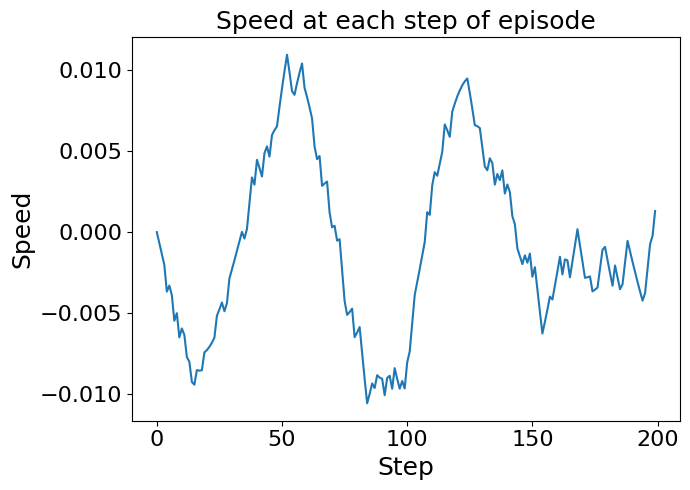

In [4]:
plt.figure(figsize=(7, 5))
plt.plot(simple_random.observed_states_speed)
plt.title('Speed at each step of episode', fontsize=18)
plt.xlabel('Step', fontsize=18)
plt.ylabel('Speed', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tight_layout()
#plt.savefig('random_speed.png') 
plt.show()

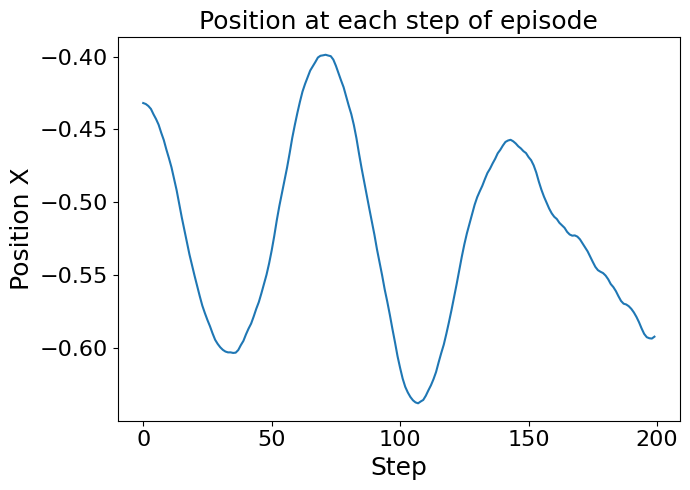

In [5]:
plt.figure(figsize=(7, 5))
plt.plot(simple_random.observed_states_position)
plt.title('Position at each step of episode', fontsize=18)
plt.xlabel('Step',fontsize=18)
plt.ylabel('Position X',fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tight_layout()
#plt.savefig('random_position.png') 
plt.show()

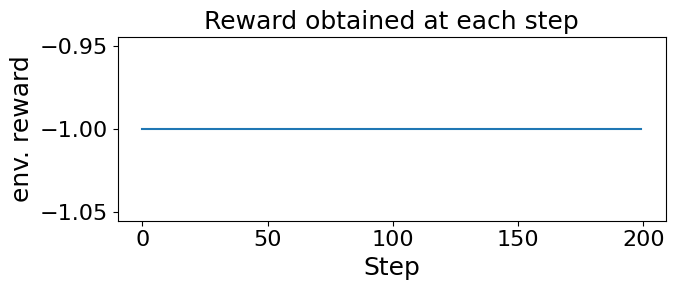

In [6]:
plt.figure(figsize=(7, 3))
plt.plot(simple_random.observed_reward)
plt.title('Reward obtained at each step', fontsize=18)
plt.xlabel('Step',fontsize=18)
plt.ylabel('env. reward',fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tight_layout()
#plt.savefig('random_envreward.png') 
plt.show()

### Multiple random agent 

In [7]:
nb_episode = 100
nb_step_per_episode = np.zeros((100))

In [8]:
for i in range(nb_episode):
    simple_random = RandomAgent(env, seed = i)
    simple_random.run()
    nb_step_per_episode[i] = simple_random.nb_step

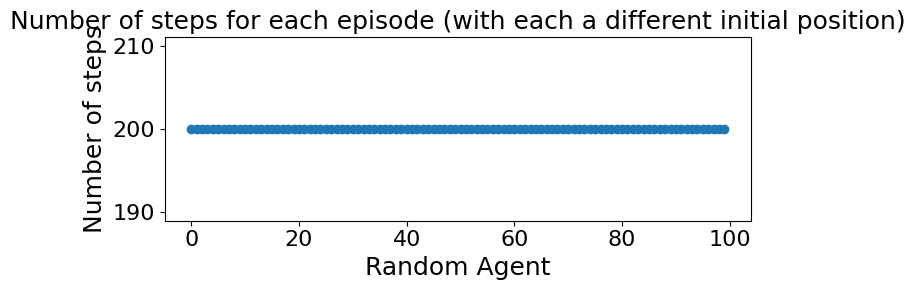

In [9]:
plt.figure(figsize=(7, 3))
plt.scatter(range(nb_episode),nb_step_per_episode)
plt.title('Number of steps for each episode (with each a different initial position)', fontsize=18)
plt.ylabel('Number of steps',fontsize=18)
plt.xlabel('Random Agent',fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tight_layout()
#plt.savefig('multiple_random.png') 
plt.show()

## DQN Agent

### Basic DQN Agent

In [2]:
basicDQN = DQNAgent(env)

In [3]:
environnement_reward, auxiliary_reward, total_reward, loss, solved_Task = basicDQN.training(1000, 64)

100%|██████████| 1000/1000 [17:28<00:00,  1.05s/it]


In [4]:
window_size = 20
window = np.ones(int(window_size)) / float(window_size)
loss2 = np.convolve(loss, window, 'same')

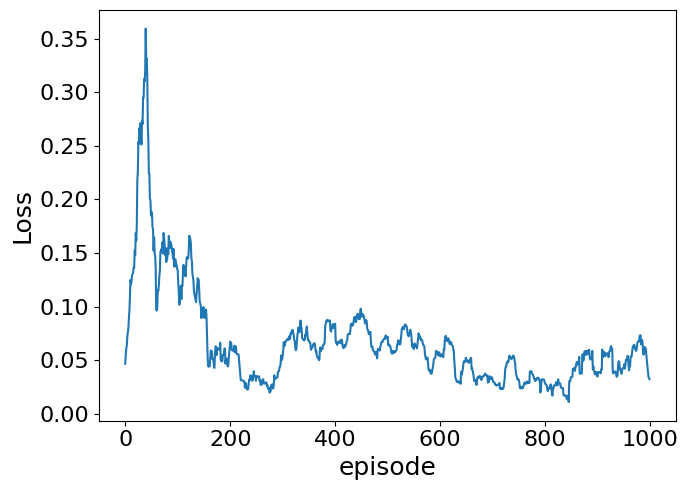

In [5]:
plt.figure(figsize=(7, 5))
plt.plot(loss2)
#plt.title('Loss at each episode', fontsize=18)
plt.xlabel('episode', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tight_layout()
plt.savefig('DQNbasic_loss.png') 
plt.show()

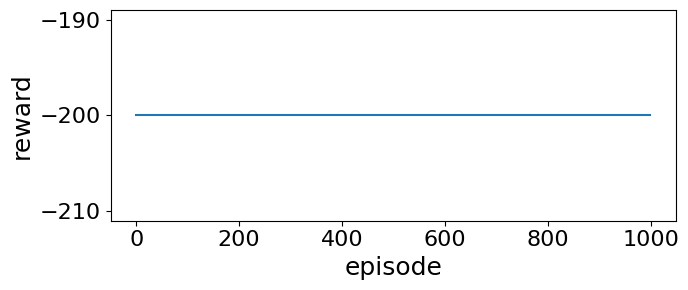

In [6]:
plt.figure(figsize=(7, 3))
plt.plot(total_reward)
#plt.title('Reward at each episode', fontsize=18)
plt.xlabel('episode', fontsize=18)
plt.ylabel('reward', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tight_layout()
plt.savefig('DQNbasic_reward.png') 
plt.show()

### DQN with heuristic reward function

In [2]:
heuristicDQN = DQNAgent(env, lr_DQN =0.003, global_reward_factor = 7.5,epsilon_decay = 30,use_log = True, heuristic_reward = True,neurons_DQN = 32)
environnement_reward, auxiliary_reward, total_reward, loss, solved_Task = heuristicDQN.training(3000, 64)

------------------------------------------
We will log this experiment in directory ./new/@global_reward_factor=7.5@20240528-152257
------------------------------------------


100%|██████████| 3000/3000 [59:13<00:00,  1.18s/it] 


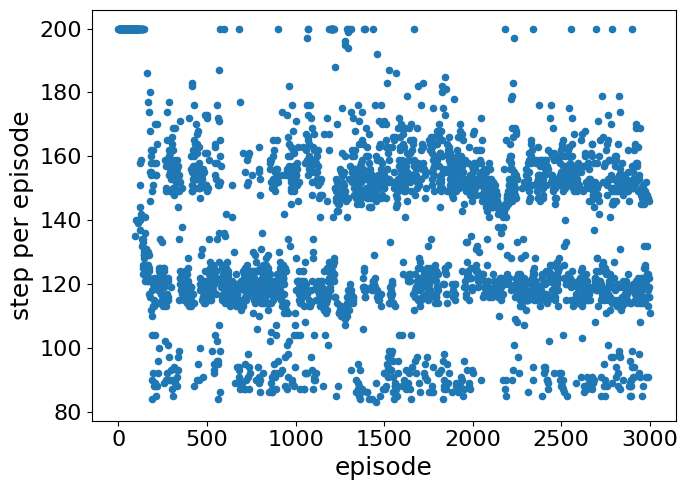

In [3]:
plt.figure(figsize=(7, 5))
plt.scatter(np.arange(3000),np.abs(environnement_reward), s=15)
#plt.title('Loss at each episode', fontsize=18)
plt.xlabel('episode', fontsize=18)
plt.ylabel('step per episode', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tight_layout()
plt.savefig('DQNheur_nbstep.png') 
plt.show()

In [4]:
window_size = 20
window = np.ones(int(window_size)) / float(window_size)
environnement_reward2 = np.convolve(environnement_reward, window, 'same')
auxiliary_reward2 = np.convolve(auxiliary_reward, window, 'same')
total_reward2 = np.convolve(total_reward, window, 'same')

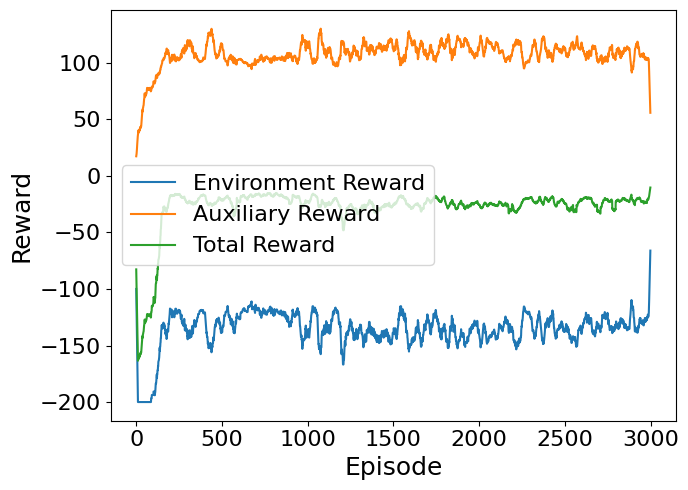

In [5]:
plt.figure(figsize=(7, 5))
plt.plot(environnement_reward2, label='Environment Reward')
plt.plot(auxiliary_reward2, label='Auxiliary Reward')
plt.plot(total_reward2, label='Total Reward')
#plt.title('Loss at each episode', fontsize=18)
plt.xlabel('Episode', fontsize=18)
plt.ylabel('Reward', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.legend(fontsize=16)
plt.tight_layout()
plt.savefig('DQNheur_reward.png') 
plt.show()

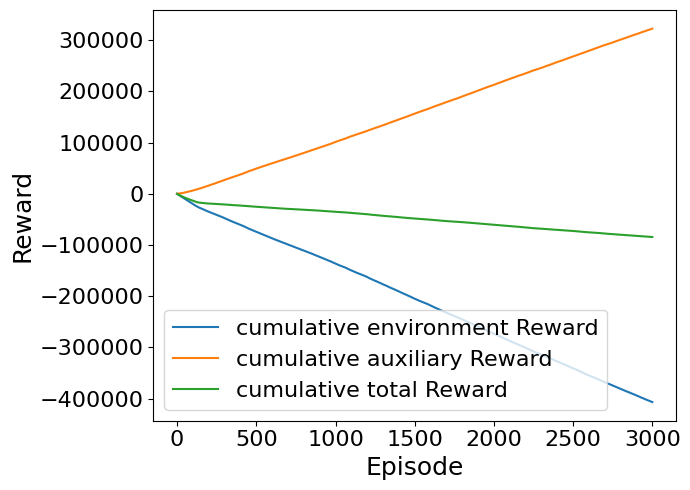

In [6]:
plt.figure(figsize=(7, 5))
plt.plot(np.cumsum(environnement_reward), label='cumulative environment Reward')
plt.plot(np.cumsum(auxiliary_reward), label='cumulative auxiliary Reward')
plt.plot(np.cumsum(total_reward), label='cumulative total Reward')
#plt.title('Loss at each episode', fontsize=18)
plt.xlabel('Episode', fontsize=18)
plt.ylabel('Reward', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.legend(fontsize=16)
plt.tight_layout()
plt.savefig('DQNheur_rewardcumul.png') 
plt.show()

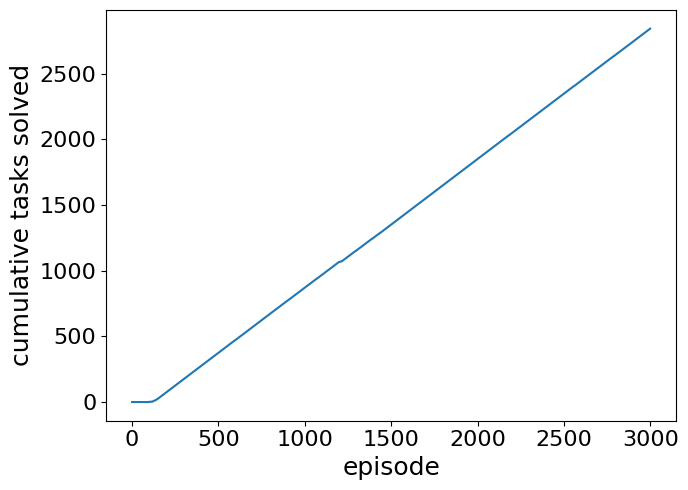

In [7]:
plt.figure(figsize=(7, 5))
plt.plot(solved_Task)
#plt.title('Loss at each episode', fontsize=18)
plt.xlabel('episode', fontsize=18)
plt.ylabel('cumulative tasks solved', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tight_layout()
plt.savefig('DQNheur_tasksolved.png') 
plt.show()

In [8]:
window_size = 20
window = np.ones(int(window_size)) / float(window_size)
loss2 = np.convolve(loss, window, 'same')

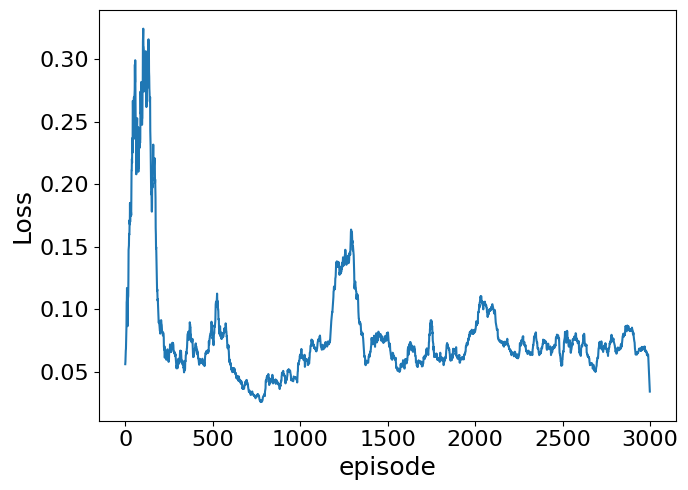

In [9]:
plt.figure(figsize=(7, 5))
plt.plot(loss2)
#plt.title('Loss at each episode', fontsize=18)
plt.xlabel('episode', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tight_layout()
plt.savefig('DQNheur_loss.png') 
plt.show()

### DQN with RND reward

In [ ]:
RND_DQN = DQNAgent(env, discount_factor = 0.99, epsilon_decay = 150, capacity = 5000, RND_reward = True, global_reward_factor = j, neurons_RND = a, neurons_DQN = 32, use_log = True, lr_DQN =c, lr_RND =b)
environnement_reward, auxiliary_reward, total_reward, loss, solved_Task = RND_DQN.training(3000, 64)

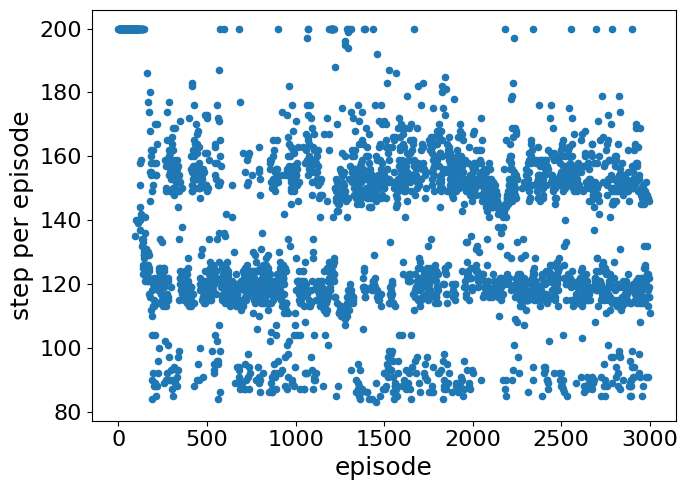

In [3]:
plt.figure(figsize=(7, 5))
plt.scatter(np.arange(3000),np.abs(environnement_reward), s=15)
#plt.title('Loss at each episode', fontsize=18)
plt.xlabel('episode', fontsize=18)
plt.ylabel('step per episode', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tight_layout()
plt.savefig('DQNRND_nbstep.png') 
plt.show()

In [4]:
window_size = 20
window = np.ones(int(window_size)) / float(window_size)
environnement_reward2 = np.convolve(environnement_reward, window, 'same')
auxiliary_reward2 = np.convolve(auxiliary_reward, window, 'same')
total_reward2 = np.convolve(total_reward, window, 'same')

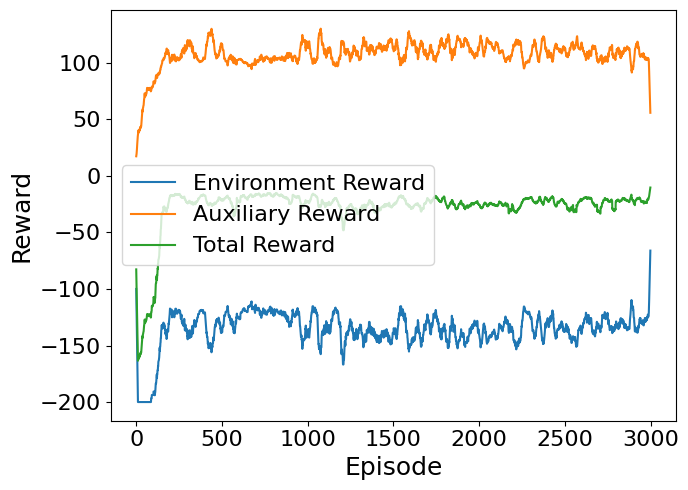

In [5]:
plt.figure(figsize=(7, 5))
plt.plot(environnement_reward2, label='Environment Reward')
plt.plot(auxiliary_reward2, label='Auxiliary Reward')
plt.plot(total_reward2, label='Total Reward')
#plt.title('Loss at each episode', fontsize=18)
plt.xlabel('Episode', fontsize=18)
plt.ylabel('Reward', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.legend(fontsize=16)
plt.tight_layout()
plt.savefig('DQNRND_reward.png') 
plt.show()

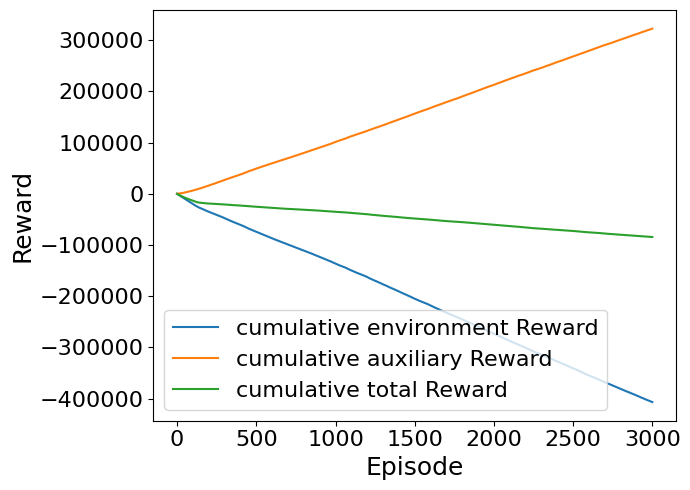

In [6]:
plt.figure(figsize=(7, 5))
plt.plot(np.cumsum(environnement_reward), label='cumulative environment Reward')
plt.plot(np.cumsum(auxiliary_reward), label='cumulative auxiliary Reward')
plt.plot(np.cumsum(total_reward), label='cumulative total Reward')
#plt.title('Loss at each episode', fontsize=18)
plt.xlabel('Episode', fontsize=18)
plt.ylabel('Reward', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.legend(fontsize=16)
plt.tight_layout()
plt.savefig('DQNRND_rewardcumul.png') 
plt.show()

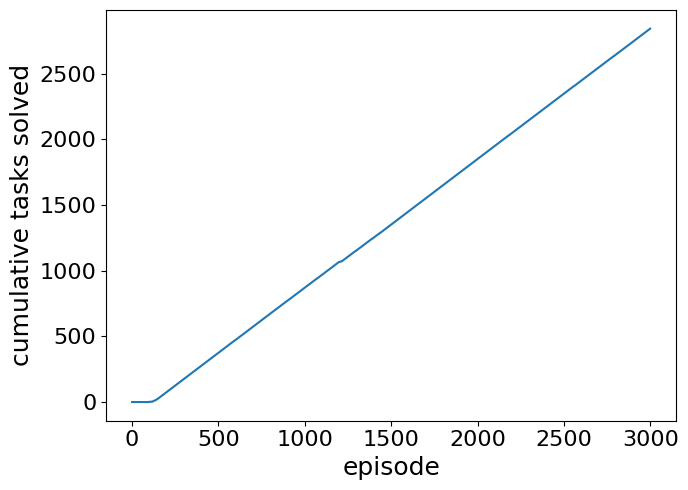

In [7]:
plt.figure(figsize=(7, 5))
plt.plot(solved_Task)
#plt.title('Loss at each episode', fontsize=18)
plt.xlabel('episode', fontsize=18)
plt.ylabel('cumulative tasks solved', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tight_layout()
plt.savefig('DQNRND_tasksolved.png') 
plt.show()

In [8]:
window_size = 20
window = np.ones(int(window_size)) / float(window_size)
loss2 = np.convolve(loss, window, 'same')

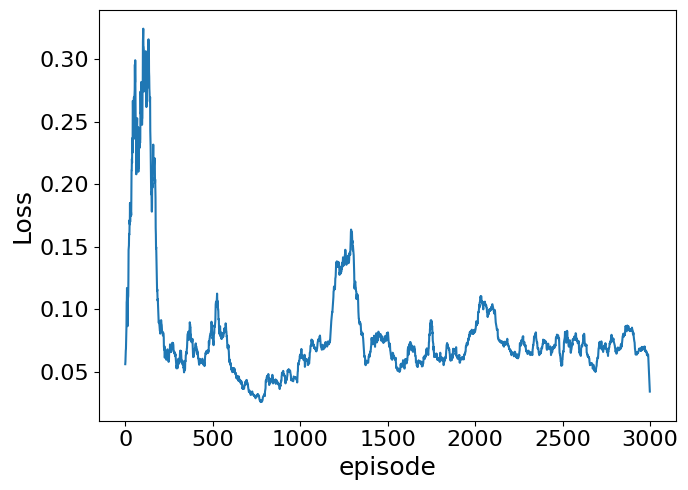

In [9]:
plt.figure(figsize=(7, 5))
plt.plot(loss2)
#plt.title('Loss at each episode', fontsize=18)
plt.xlabel('episode', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tight_layout()
plt.savefig('DQNRND_loss.png') 
plt.show()

## DynaAgent

## Comparison between Agent

In [10]:
DQN_heuristic = DQNAgent(env, heuristic_reward = True, load_model = True )
DQN_RND = DQNAgent(env, RND_reward = True, load_model = True )

SyntaxError: invalid syntax (44153010.py, line 1)

In [ ]:
nb_episode = 1000
nb_step_per_episode_DQN_heuristic = np.zeros((1000))
nb_step_per_episode_DQN_RND = np.zeros((1000))
nb_step_per_episode_Dyna = np.zeros((1000))

In [ ]:
for i in range(nb_episode):
    DQN_heuristic.run(i)
    DQN_RND.run(i)
    nb_step_per_episode_DQN_heuristic[i] = DQN_heuristic.nb_step
    nb_step_per_episode_DQN_RND[i] = DQN_RND.nb_step

In [ ]:
#do the plot using "nb_step_per_episode"